# Data Science Challenge

In [1]:
# If additional packages are needed that are not installed by default, uncomment the last two lines of this 
# cell and replace <package list> with a list of additional packages.
# This will ensure the notebook has all the dependencies and works everywhere

#import sys
#!{sys.executable} -m pip install <package list>

In [3]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 101)

## Data Description

Column | Description
:---|:---
`id` | Record index
`timestamp` | Datetime (YYYY:MM:DD HH AM/PM)
`season` | Season (spring, summer, fall, winter)
`holiday` | Whether day is a holiday or not (Yes or No)
`workingday` | Whether day is a working day or not (Yes or No)
`weather`| Weather condition (Clear or partly cloudy, Mist, Light snow or rain, heavy rain/ice pellets/ snow + fog 
`temp`| Average temperature recorded for the hour ( in degree Celsius)
`temp_feel`| Average feeling temperature recorded for the hour ( in degree Celsius)
`hum`| Average humidity recorded for the hour (in %)
`windspeed`| Average wind speed recorded for the hour (in miles/hour)
`demand`| Hourly count of bikes rented

## Data Wrangling & Visualization

In [4]:
# The dataset is already loaded below
data = pd.read_csv("train.csv")

In [5]:
data.head()

,id,timestamp,season,holiday,workingday,weather,temp,temp_feel,humidity,windspeed,demand
0,1,2017-01-01 00:00:00,spring,No,No,Clear or partly cloudy,9.84,14.395,81.0,0.0,2.772589
1,2,2017-01-01 01:00:00,spring,No,No,Clear or partly cloudy,9.02,13.635,80.0,0.0,3.688879
2,3,2017-01-01 02:00:00,spring,No,No,Clear or partly cloudy,9.02,13.635,80.0,0.0,3.465736
3,4,2017-01-01 03:00:00,spring,No,No,Clear or partly cloudy,9.84,14.395,75.0,0.0,2.564949
4,5,2017-01-01 04:00:00,spring,No,No,Clear or partly cloudy,9.84,14.395,75.0,0.0,0.000000


In [6]:
#Explore columns
data.columns

Index(['id', 'timestamp', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'temp_feel', 'humidity', 'windspeed', 'demand'],
      dtype='object')

In [7]:
#Description
data.describe()

,id,temp,temp_feel,humidity,windspeed,demand
count,8708.000000,7506.000000,8606.000000,8669.00000,8508.000000,8708.000000
mean,4354.500000,20.089454,23.531261,60.99354,13.048589,4.452725
std,2513.927405,8.023304,8.737997,19.67989,8.311058,1.493963
min,1.000000,0.820000,0.760000,0.00000,0.000000,0.000000
25%,2177.750000,13.940000,15.910000,46.00000,7.001500,3.637586
50%,4354.500000,20.500000,24.240000,60.00000,12.998000,4.867534
75%,6531.250000,26.240000,31.060000,77.00000,19.001200,5.556828
max,8708.000000,41.000000,45.455000,100.00000,56.996900,6.792344


In [8]:
# Change season from string to int
data['season'] = data['season'].replace({'spring': 1, 'summer': 2, 'fall': 3, 'winter': 4})
data.head()

,id,timestamp,season,holiday,workingday,weather,temp,temp_feel,humidity,windspeed,demand
0,1,2017-01-01 00:00:00,1,No,No,Clear or partly cloudy,9.84,14.395,81.0,0.0,2.772589
1,2,2017-01-01 01:00:00,1,No,No,Clear or partly cloudy,9.02,13.635,80.0,0.0,3.688879
2,3,2017-01-01 02:00:00,1,No,No,Clear or partly cloudy,9.02,13.635,80.0,0.0,3.465736
3,4,2017-01-01 03:00:00,1,No,No,Clear or partly cloudy,9.84,14.395,75.0,0.0,2.564949
4,5,2017-01-01 04:00:00,1,No,No,Clear or partly cloudy,9.84,14.395,75.0,0.0,0.000000


In [9]:
# Change weather to int
data['weather'] = data['weather'].replace({'Clear or partly cloudy': 1, 'Mist': 2, 'Light snow or rain': 3, 
                                 'heavy rain/ice pellets/snow + fog': 4})
data.head()

,id,timestamp,season,holiday,workingday,weather,temp,temp_feel,humidity,windspeed,demand
0,1,2017-01-01 00:00:00,1,No,No,1,9.84,14.395,81.0,0.0,2.772589
1,2,2017-01-01 01:00:00,1,No,No,1,9.02,13.635,80.0,0.0,3.688879
2,3,2017-01-01 02:00:00,1,No,No,1,9.02,13.635,80.0,0.0,3.465736
3,4,2017-01-01 03:00:00,1,No,No,1,9.84,14.395,75.0,0.0,2.564949
4,5,2017-01-01 04:00:00,1,No,No,1,9.84,14.395,75.0,0.0,0.000000


In [10]:
# Change holiday to int
data['holiday'] = data['holiday'].replace({'No': 0, 'Yes': 1})
data.head()

,id,timestamp,season,holiday,workingday,weather,temp,temp_feel,humidity,windspeed,demand
0,1,2017-01-01 00:00:00,1,0,No,1,9.84,14.395,81.0,0.0,2.772589
1,2,2017-01-01 01:00:00,1,0,No,1,9.02,13.635,80.0,0.0,3.688879
2,3,2017-01-01 02:00:00,1,0,No,1,9.02,13.635,80.0,0.0,3.465736
3,4,2017-01-01 03:00:00,1,0,No,1,9.84,14.395,75.0,0.0,2.564949
4,5,2017-01-01 04:00:00,1,0,No,1,9.84,14.395,75.0,0.0,0.000000


In [11]:
# Change working day to int
data['workingday'] = data['workingday'].replace({'No': 0, 'Yes': 1})
data.head()

,id,timestamp,season,holiday,workingday,weather,temp,temp_feel,humidity,windspeed,demand
0,1,2017-01-01 00:00:00,1,0,0,1,9.84,14.395,81.0,0.0,2.772589
1,2,2017-01-01 01:00:00,1,0,0,1,9.02,13.635,80.0,0.0,3.688879
2,3,2017-01-01 02:00:00,1,0,0,1,9.02,13.635,80.0,0.0,3.465736
3,4,2017-01-01 03:00:00,1,0,0,1,9.84,14.395,75.0,0.0,2.564949
4,5,2017-01-01 04:00:00,1,0,0,1,9.84,14.395,75.0,0.0,0.000000


In [12]:
# Split timestamp
data['hour'] = [t.hour for t in pd.DatetimeIndex(data.timestamp)]
data['day'] = [t.dayofweek for t in pd.DatetimeIndex(data.timestamp)]
data['month'] = [t.month for t in pd.DatetimeIndex(data.timestamp)]
data['year'] = [t.year for t in pd.DatetimeIndex(data.timestamp)]

In [13]:
# Drop NaN (null) values
data = data.dropna()

In [14]:
# Define data for training
X, y = data.iloc[:, 0:], data['demand']

In [15]:
# drop demand column
X = X.drop(columns='demand')

In [31]:
X = X.drop(columns='timestamp')

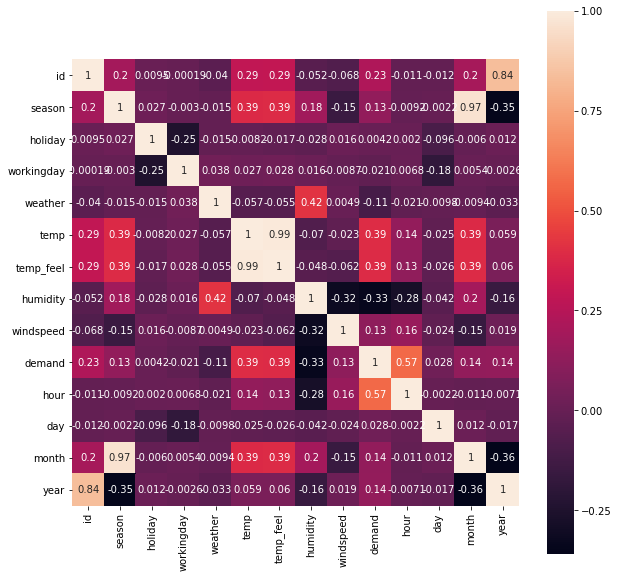

In [16]:
# Correlation matrix

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data=data.corr(), square=True, annot=True, cbar=True, ax=ax)

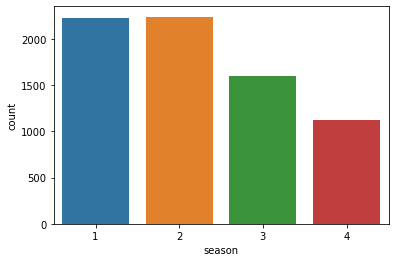

In [17]:
sns.countplot(data.season)

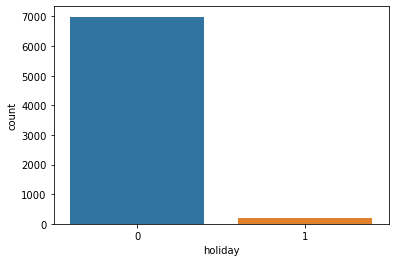

In [18]:
sns.countplot(data.holiday)

In [19]:
data.columns

Index(['id', 'timestamp', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'temp_feel', 'humidity', 'windspeed', 'demand', 'hour', 'day', 'month',
       'year'],
      dtype='object')

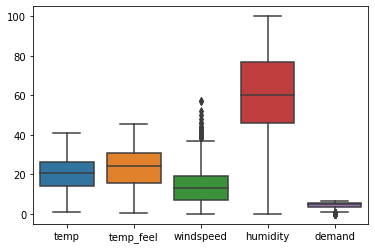

In [20]:
# variation of various parameters

sns.boxplot(data=data[['temp', 'temp_feel', 'windspeed', 'humidity', 'demand']])

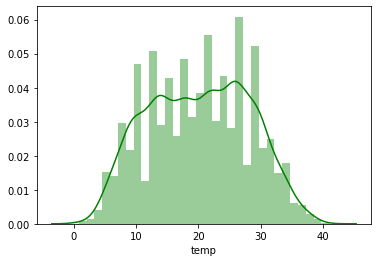

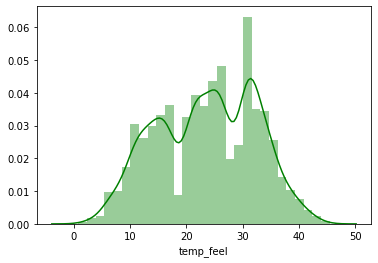

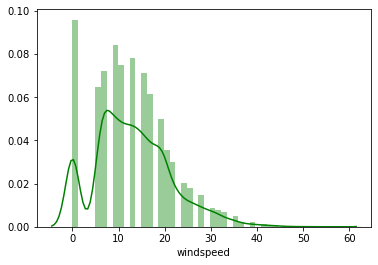

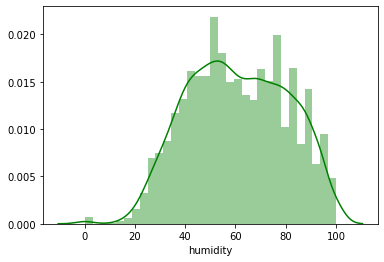

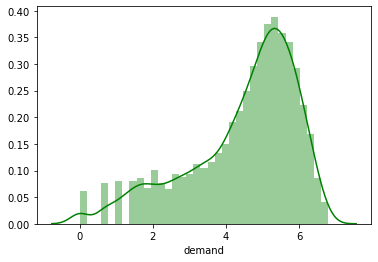

In [21]:
col = ['temp', 'temp_feel', 'windspeed', 'humidity', 'demand']

for i in range(len(col)):
    sns.distplot(data[col[i]], color='green')
    plt.show()

## Visualization, Modeling, Machine Learning

Build a model that can predict hourly demand and identify how different features influence the decision. Please explain the findings effectively to technical and non-technical audiences using comments and visualizations, if appropriate.
- **Build an optimized model that effectively solves the business problem.**
- **The model will be evaluated on the basis of mean absolute error.**
- **Read the test.csv file and prepare features for testing.**

In [33]:
#Loading Test data
test_data=pd.read_csv('test.csv')
test_data.head()

,id,timestamp,season,holiday,workingday,weather,temp,temp_feel,humidity,windspeed
0,8709,2018-08-05 05:00:00,fall,No,No,Clear or partly cloudy,29.52,34.850,74.0,16.9979
1,8710,2018-08-05 06:00:00,fall,No,No,Clear or partly cloudy,29.52,34.850,79.0,16.9979
2,8712,2018-08-05 08:00:00,fall,No,No,Clear or partly cloudy,31.16,36.365,66.0,22.0028
3,8713,2018-08-05 09:00:00,fall,No,No,Clear or partly cloudy,32.80,38.635,59.0,23.9994
4,8714,2018-08-05 10:00:00,fall,No,No,Clear or partly cloudy,32.80,38.635,59.0,27.9993


In [34]:
test_data = test_data.dropna()
test_data['weather'] = test_data['weather'].replace({'Clear or partly cloudy': 1, 'Mist': 2, 'Light snow or rain': 3, 
                                 'heavy rain/ice pellets/snow + fog': 4})
test_data['workingday'] = test_data['workingday'].replace({'No': 0, 'Yes': 1})
test_data['holiday'] = test_data['holiday'].replace({'No': 0, 'Yes': 1})
test_data['season'] = test_data['season'].replace({'spring': 1, 'summer': 2, 'fall': 3, 'winter': 4})
test_data.head()

,id,timestamp,season,holiday,workingday,weather,temp,temp_feel,humidity,windspeed
0,8709,2018-08-05 05:00:00,3,0,0,1,29.52,34.850,74.0,16.9979
1,8710,2018-08-05 06:00:00,3,0,0,1,29.52,34.850,79.0,16.9979
2,8712,2018-08-05 08:00:00,3,0,0,1,31.16,36.365,66.0,22.0028
3,8713,2018-08-05 09:00:00,3,0,0,1,32.80,38.635,59.0,23.9994
4,8714,2018-08-05 10:00:00,3,0,0,1,32.80,38.635,59.0,27.9993


In [35]:
# split data 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

In [36]:
# scale features so no feature has imbalanced effect on prediction

from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
X_train_std = scl.fit_transform(X_train)
X_test_std = scl.transform(X_test)

In [37]:
# use random forest ML model

from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=400, criterion='mse', random_state=1, n_jobs=-1)
forest.fit(X_train_std, y_train)
y_train_pred = forest.predict(X_train_std)
y_test_pred = forest.predict(X_test_std)

In [40]:
# find mean absolute error

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
y_predicted_r = forest.predict(X_test)
r = r2_score(y_test, y_predicted_r)
mae = mean_absolute_error(y_test,y_predicted_r)

In [41]:
# This measure tells us how much the prediction varies from the actual 
# value (± 1.2678302392529337 in this case) on average
mae

1.2678302392529335

In [42]:
# split timestamp for test data

test_data['hour'] = [t.hour for t in pd.DatetimeIndex(test_data.timestamp)]
test_data['day'] = [t.dayofweek for t in pd.DatetimeIndex(test_data.timestamp)]
test_data['month'] = [t.month for t in pd.DatetimeIndex(test_data.timestamp)]
test_data['year'] = [t.year for t in pd.DatetimeIndex(test_data.timestamp)]

In [43]:
# clean test data

X_test=test_data.iloc[:, 0:]
X_test = X_test.drop(columns='timestamp')

In [44]:
# standardize test data

X_test = scl.transform(X_test)

In [45]:
# predict on test data

y_test = forest.predict(X_test)



**Identify the most important features of the model for management.**

> #### Task:
- **Visualize the top 20 features and their feature importance.**


In [46]:
feature_names = [f"feature {i}" for i in range(X.shape[1])]

In [47]:
import time

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

Text(0.5, 1.0, 'Feature Importances')

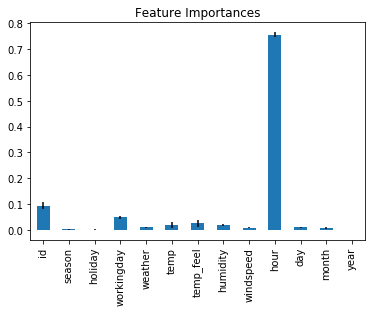

In [55]:
forest_importances = pd.Series(importances, index=X.columns)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature Importances")

---